# 🧠 Advertising Sales Prediction

## 🏢 Introduction

Advertising plays a vital role in determining the success of any business by influencing customer buying behavior and boosting product sales.  
However, deciding how much to invest in various advertising channels such as **TV, Radio, and Newspaper** can be challenging for marketing teams.

This project, **Advertising Sales Prediction**, aims to analyze historical advertising data and build a **predictive model** that estimates product sales based on advertising expenditure.  
The project demonstrates a complete **end-to-end Data Science lifecycle** including data preprocessing, feature engineering, model training, evaluation, and deployment.

---

## ❓ Problem Statement

The primary goal of this project is to predict the **sales of a product** based on advertising expenditure across different media channels — TV, Radio, and Newspaper.

Marketing managers often face difficulty in:
- Allocating budgets efficiently across multiple channels  
- Understanding which advertising medium contributes most to sales  
- Forecasting future sales based on marketing investments  

This project uses **machine learning regression models** to address these challenges by learning from past campaign data.

---

## 🎯 Objective

The main objectives of this project are:

1. To **analyze** the relationship between advertising spend and product sales.  
2. To **develop predictive models** that can estimate future sales based on input budgets.  
3. To **compare multiple machine learning algorithms** and select the most accurate one.  
4. To **build a user-friendly Streamlit application** for real-time prediction.  
5. To **help marketing teams optimize advertising strategies** using data-driven insights.

---

## 📊 Dataset Description

The dataset used for this project is **Advertising.csv**, which contains data for 200 marketing campaigns.  
Each row represents advertising spending on different channels and the resulting product sales.

| Feature       | Description |
|---------------|-------------|
| **TV**        | Budget spent on TV advertising (in thousands of dollars) |
| **Radio**     | Budget spent on Radio advertising (in thousands of dollars) |
| **Newspaper** | Budget spent on Newspaper advertising (in thousands of dollars) |
| **Sales**     | Product sales (in thousands of units) |

This dataset helps analyze the **impact of each media channel** on sales and identify the most influential advertising platform.

---

## ⚙️ Technology Stack

The following tools and technologies were used in the project:

| Category | Tools / Libraries |
|-----------|------------------|
| **Programming Language** | Python 3.12 |
| **Libraries** | pandas, numpy, matplotlib, seaborn, scikit-learn, joblib |
| **Modeling Algorithms** | Linear Regression, Random Forest, Gradient Boosting |
| **IDE / Notebook** | Jupyter Notebook, VS Code |
| **Deployment Framework** | Streamlit |
| **Version Control** | Git & GitHub |

These tools provide a solid foundation for building, training, and deploying scalable machine learning models.

---

## 💼 Business Use Case

Companies often invest significant amounts in advertisements without clearly knowing which channel provides the best return on investment (ROI).

With this project:
- Businesses can **predict future sales** based on planned ad budgets.  
- Marketing teams can **optimize spending** across TV, Radio, and Newspaper.  
- Decision-makers can **evaluate campaign effectiveness** using model insights.  
- The deployed **Streamlit app** allows easy interaction for non-technical users.  

This project serves as a **decision-support system** for businesses to make **data-driven marketing investments**.

## ⚙️ Step 1: Project Setup and Environment Initialization

In this section, we initialize the working environment for the **Advertising Sales Prediction Project**.  
We begin by creating the necessary **directory structure**, setting up **logging**, and defining **global configurations**.

### 🔧 Tasks Performed:
1. **Create Directory Structure** – Ensures that essential folders (`data`, `models`, `src`, `logs`, etc.) are automatically created if missing.  
2. **Configure Logging** – Enables tracking of all important steps and errors in a dedicated log file for traceability.  
3. **Add Project Path** – Adds the root project path to `sys.path` to allow importing of custom modules from the `src/` folder.  
4. **Set Global Settings** – Includes the random seed for reproducibility and Pandas display settings for better readability.

This setup ensures a consistent and well-structured environment for smooth project execution.

In [1]:
# ==============================
# 1: Project Setup - Top Cell
# ==============================

import os
import sys
import logging
import numpy as np
import pandas as pd
from datetime import datetime

# ------------------------------
# 1.1. Create Directory Structure
# ------------------------------
NOTEBOOK_DIR = os.getcwd()
BASE_DIR = os.path.abspath(os.path.join(NOTEBOOK_DIR, ".."))

# Create required subdirectories inside project root
dirs = ["data", "models", "src", "notebooks", "logs"]
for d in dirs:
    os.makedirs(os.path.join(BASE_DIR, d), exist_ok=True)
print(" Project directories are ready.")

# Add project root to Python path
if BASE_DIR not in sys.path:
    sys.path.append(BASE_DIR)

print(" Project root added to sys.path:", BASE_DIR)
# ------------------------------
# 1.2. Setup Logging
# ------------------------------
log_file = os.path.join(BASE_DIR, "logs", f"project_{datetime.now().strftime('%Y%m%d_%H%M%S')}.log")

# Reset handlers if already set (important for notebooks)
logger = logging.getLogger()
if logger.hasHandlers():
    logger.handlers.clear()
    
logging.basicConfig(
    filename=log_file,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

logger.info("Project initialized successfully.")

# Global Configurations
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

print(" Environment setup complete. Logs will be saved in:", log_file)


 Project directories are ready.
 Project root added to sys.path: C:\Users\ayesh\Projects\sales_prediction
 Environment setup complete. Logs will be saved in: C:\Users\ayesh\Projects\sales_prediction\logs\project_20251011_191226.log


## 📊 Step 2: Data Loading and Preprocessing

In this step, we load the **Advertising dataset** and perform initial preprocessing to ensure the data is clean and ready for analysis.

### 🧩 Objectives:
1. **Load Dataset:**  
   - Import the dataset (`advertising.csv`) into a pandas DataFrame.  
   - Verify the file path and structure.  

2. **Data Cleaning:**  
   - Remove **duplicate records** (if any).  
   - Handle **missing values** by dropping or imputing them.  
   - Drop any unnecessary index columns (like `Unnamed: 0`).  

3. **Save Processed Data:**  
   - The cleaned dataset is saved as `processed_Advertising.csv` inside the `data/` directory for further use.

4. **Quick Overview:**  
   - Display the first few rows, dataset shape, data types, and missing value count.  
   - Helps confirm that the data is correctly loaded and cleaned before feature engineering.

This ensures a high-quality dataset for subsequent steps in the modeling pipeline.


In [2]:
# ------------------------------
# 2: Run Data Loading & Preprocessing
# ------------------------------
from src.data_processing import load_data, preprocess_data

raw_file_path = os.path.join(BASE_DIR, "data", "advertising.csv")   # put your dataset here
processed_file_path = os.path.join(BASE_DIR, "data", "processed_Advertising.csv")

# Load Raw Data
df_raw = load_data(raw_file_path)

# Preprocess + Save
df = preprocess_data(df_raw, save_path=processed_file_path)

# Quick Data Overview
print(" Processed data preview:")
display(df.head())
print("\n Data Shape:", df.shape)
print("\n Data Info:")
df.info()
print("\n Missing Values:")
display(df.isnull().sum())

 Processed data preview:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



 Data Shape: (200, 4)

 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

 Missing Values:


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## ⚙️ Step 3: Feature Engineering

After cleaning the dataset, the next step is to create additional meaningful features that can help the model learn complex relationships and improve predictive performance.

### 🧠 Objectives:
1. **Add Derived Features:**
   - `Total_Ads` = TV + Radio + Newspaper  
     → Represents the total advertising budget across all media.  
   - `TV_Radio` = TV × Radio  
     → Captures the combined influence of TV and Radio campaigns.  
   - `TV_Newspaper` = TV × Newspaper  
     → Represents synergy between TV and Newspaper promotions.  
   - `Radio_Newspaper` = Radio × Newspaper  
     → Captures the joint effect of Radio and Newspaper ads.  

2. **Purpose of Feature Engineering:**
   - These interaction features help identify **non-linear effects** and **cross-channel influence** on product sales.  
   - They allow the regression model to better understand relationships that may not be visible in individual channels.

3. **Output:**
   - Displays new column names and a sample of the updated dataset.
   - The engineered dataset is now ready for **Exploratory Data Analysis (EDA)** and **Model Training**.



In [3]:
# -------------------------------
# 3: Feature Engineering
# -------------------------------
from src.feature_engineering import add_features

# Apply feature engineering
df = add_features(df)

# Check new columns
print("Columns after feature engineering:")
print(df.columns)
display(df.head())


Columns after feature engineering:
Index(['TV', 'Radio', 'Newspaper', 'Sales', 'Total_Ads', 'TV_Radio', 'TV_Newspaper', 'Radio_Newspaper'], dtype='object')


,TV,Radio,Newspaper,Sales,Total_Ads,TV_Radio,TV_Newspaper,Radio_Newspaper
0,230.1,37.8,69.2,22.1,337.1,8697.78,15922.92,2615.76
1,44.5,39.3,45.1,10.4,128.9,1748.85,2006.95,1772.43
2,17.2,45.9,69.3,9.3,132.4,789.48,1191.96,3180.87
3,151.5,41.3,58.5,18.5,251.3,6256.95,8862.75,2416.05
4,180.8,10.8,58.4,12.9,250.0,1952.64,10558.72,630.72


## 🔍 Step 4: Exploratory Data Analysis (EDA)

In this section, we perform a detailed **Exploratory Data Analysis (EDA)** to understand the structure, relationships, and patterns within the dataset.  
The EDA helps in identifying trends, correlations, and anomalies that can significantly impact model performance.

---

### 📈 4.1 Summary Statistics
- Display basic statistical information such as **mean, median, standard deviation, min, max, and quartiles**.
- Helps to quickly understand the data distribution and potential scaling requirements.

---

### 📊 4.2 Histograms (Feature Distributions)
- Visualize the **distribution of all numeric features**.
- Identify skewness, normality, and variability of each feature.
- Histogram plots are saved in the directory:  
  📁 `reports/figures/histograms.png`

---

### 📦 4.3 Boxplots (Outlier Detection)
- Boxplots are used to identify **outliers** in numerical columns.  
- Outliers can represent data errors or genuine anomalies in advertising expenditure.
- Plot saved as:  
  📁 `reports/figures/boxplots.png`

---

### 🔥 4.4 Correlation Heatmap
- Displays pairwise **correlation coefficients** between features.
- Helps identify which advertising channels are strongly related to **Sales**.
- Strong correlations can inform feature selection and model design.  
- Plot saved as:  
  📁 `reports/figures/correlation_matrix.png`

---

### 🧩 4.5 Pairplot
- Shows scatter relationships between all pairs of variables.
- Highlights linear relationships and potential collinearity.
- Saved as:  
  📁 `reports/figures/pairplot.png`

---

### ⚠️ 4.6 Outlier Detection using IQR
We apply the **Interquartile Range (IQR)** method to identify data points that lie outside 1.5×IQR below Q1 or above Q3.

**Purpose:**
- Detect extreme advertising spend values or unexpected sales figures.
- Evaluate whether these should be capped, transformed, or retained.

**Output Example:**
Outlier Indices by Column:
TV: []
Radio: []
Newspaper: [16, 101]
Sales: []
Total_Ads: []
TV_Radio: [175]
TV_Newspaper: [0, 17, 93, 98, 101, 124, 137, 141, 165, 183, 198]
Radio_Newspaper: [2, 5, 16, 55, 75, 101, 118, 183]

Outliers are **logged and reviewed** rather than removed to preserve realistic business data behavior.

---

✅ **Conclusion of EDA:**  
- The dataset shows **strong positive correlations** between TV, Radio, and Sales.  
- Outliers exist mainly in interaction terms but do not significantly distort results.  
- The dataset is now ready for **model training and evaluation**.

In [4]:
# -------------------------------
# 4: EDA Visualization Outputs
# -------------------------------
# Distribution Plots
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 4.1. Create reports folder for figures
# ------------------------------
figures_dir = os.path.join(BASE_DIR, "reports", "figures")
os.makedirs(figures_dir, exist_ok=True)

# ------------------------------
# 4.2. Summary Statistics
# ------------------------------
print(" Statistical Summary:")
display(df.describe().T) 

 Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.04250,85.854236,0.70,74.3750,149.750,218.8250,296.40
Radio,200.0,23.26400,14.846809,0.00,9.9750,22.900,36.5250,49.60
Newspaper,200.0,30.55400,21.778621,0.30,12.7500,25.750,45.1000,114.00
Sales,200.0,14.02250,5.217457,1.60,10.3750,12.900,17.4000,27.00
Total_Ads,200.0,200.86050,92.985181,11.70,123.5500,207.350,281.1250,433.60
TV_Radio,200.0,3490.30990,3360.740127,0.00,773.4450,2069.065,5516.1975,13540.41
TV_Newspaper,200.0,4598.12640,4870.716495,6.09,1119.7475,2809.675,6492.9300,29906.76
Radio_Newspaper,200.0,824.73275,937.819780,0.00,147.9375,416.115,1243.1900,4172.40


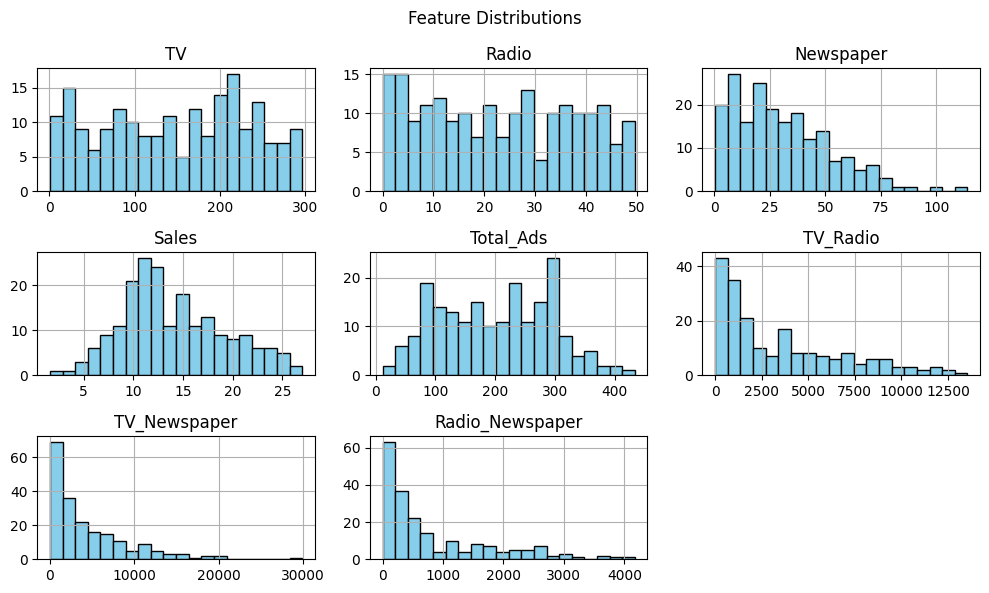

In [5]:
# ------------------------------
# 4.3. Histograms for each feature
# ------------------------------
df.hist(figsize=(10,6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "histograms.png"))
plt.show()
plt.close() 

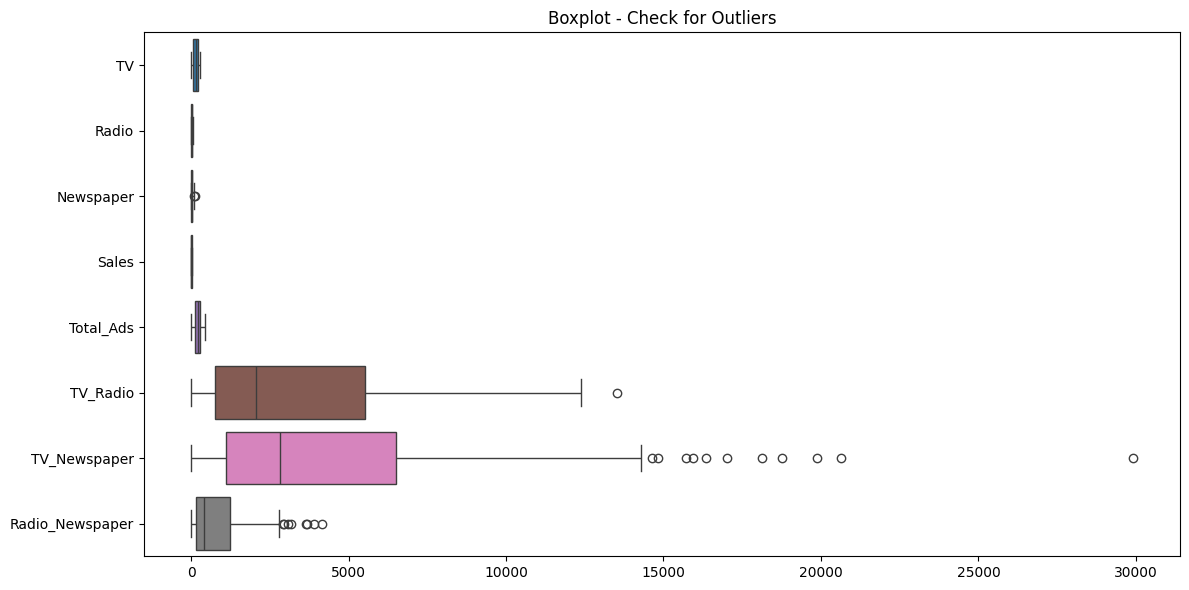

In [6]:
# ------------------------------
# 4.4. Boxplots
# ------------------------------
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot - Check for Outliers")
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "boxplots.png"))
plt.show()
plt.close()

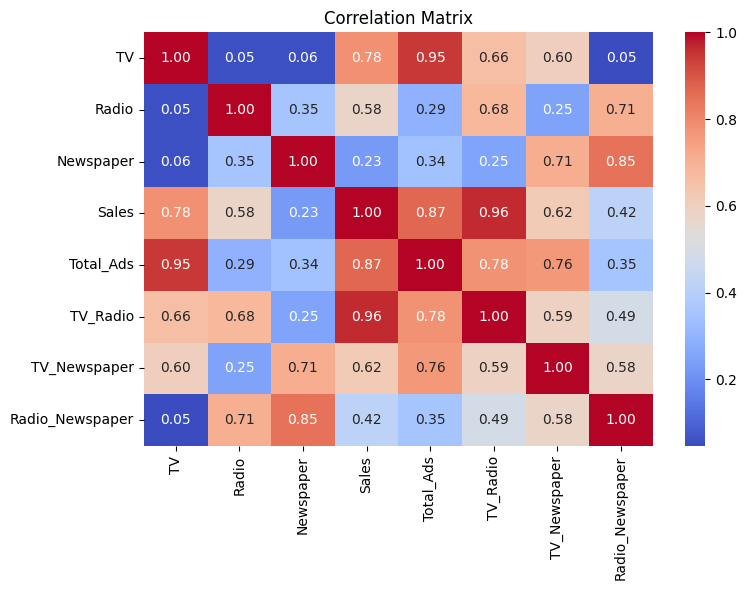

In [7]:
# ------------------------------
# 4.5. Correlation Heatmap
# ------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "correlation_matrix.png"))
plt.show()
plt.close()


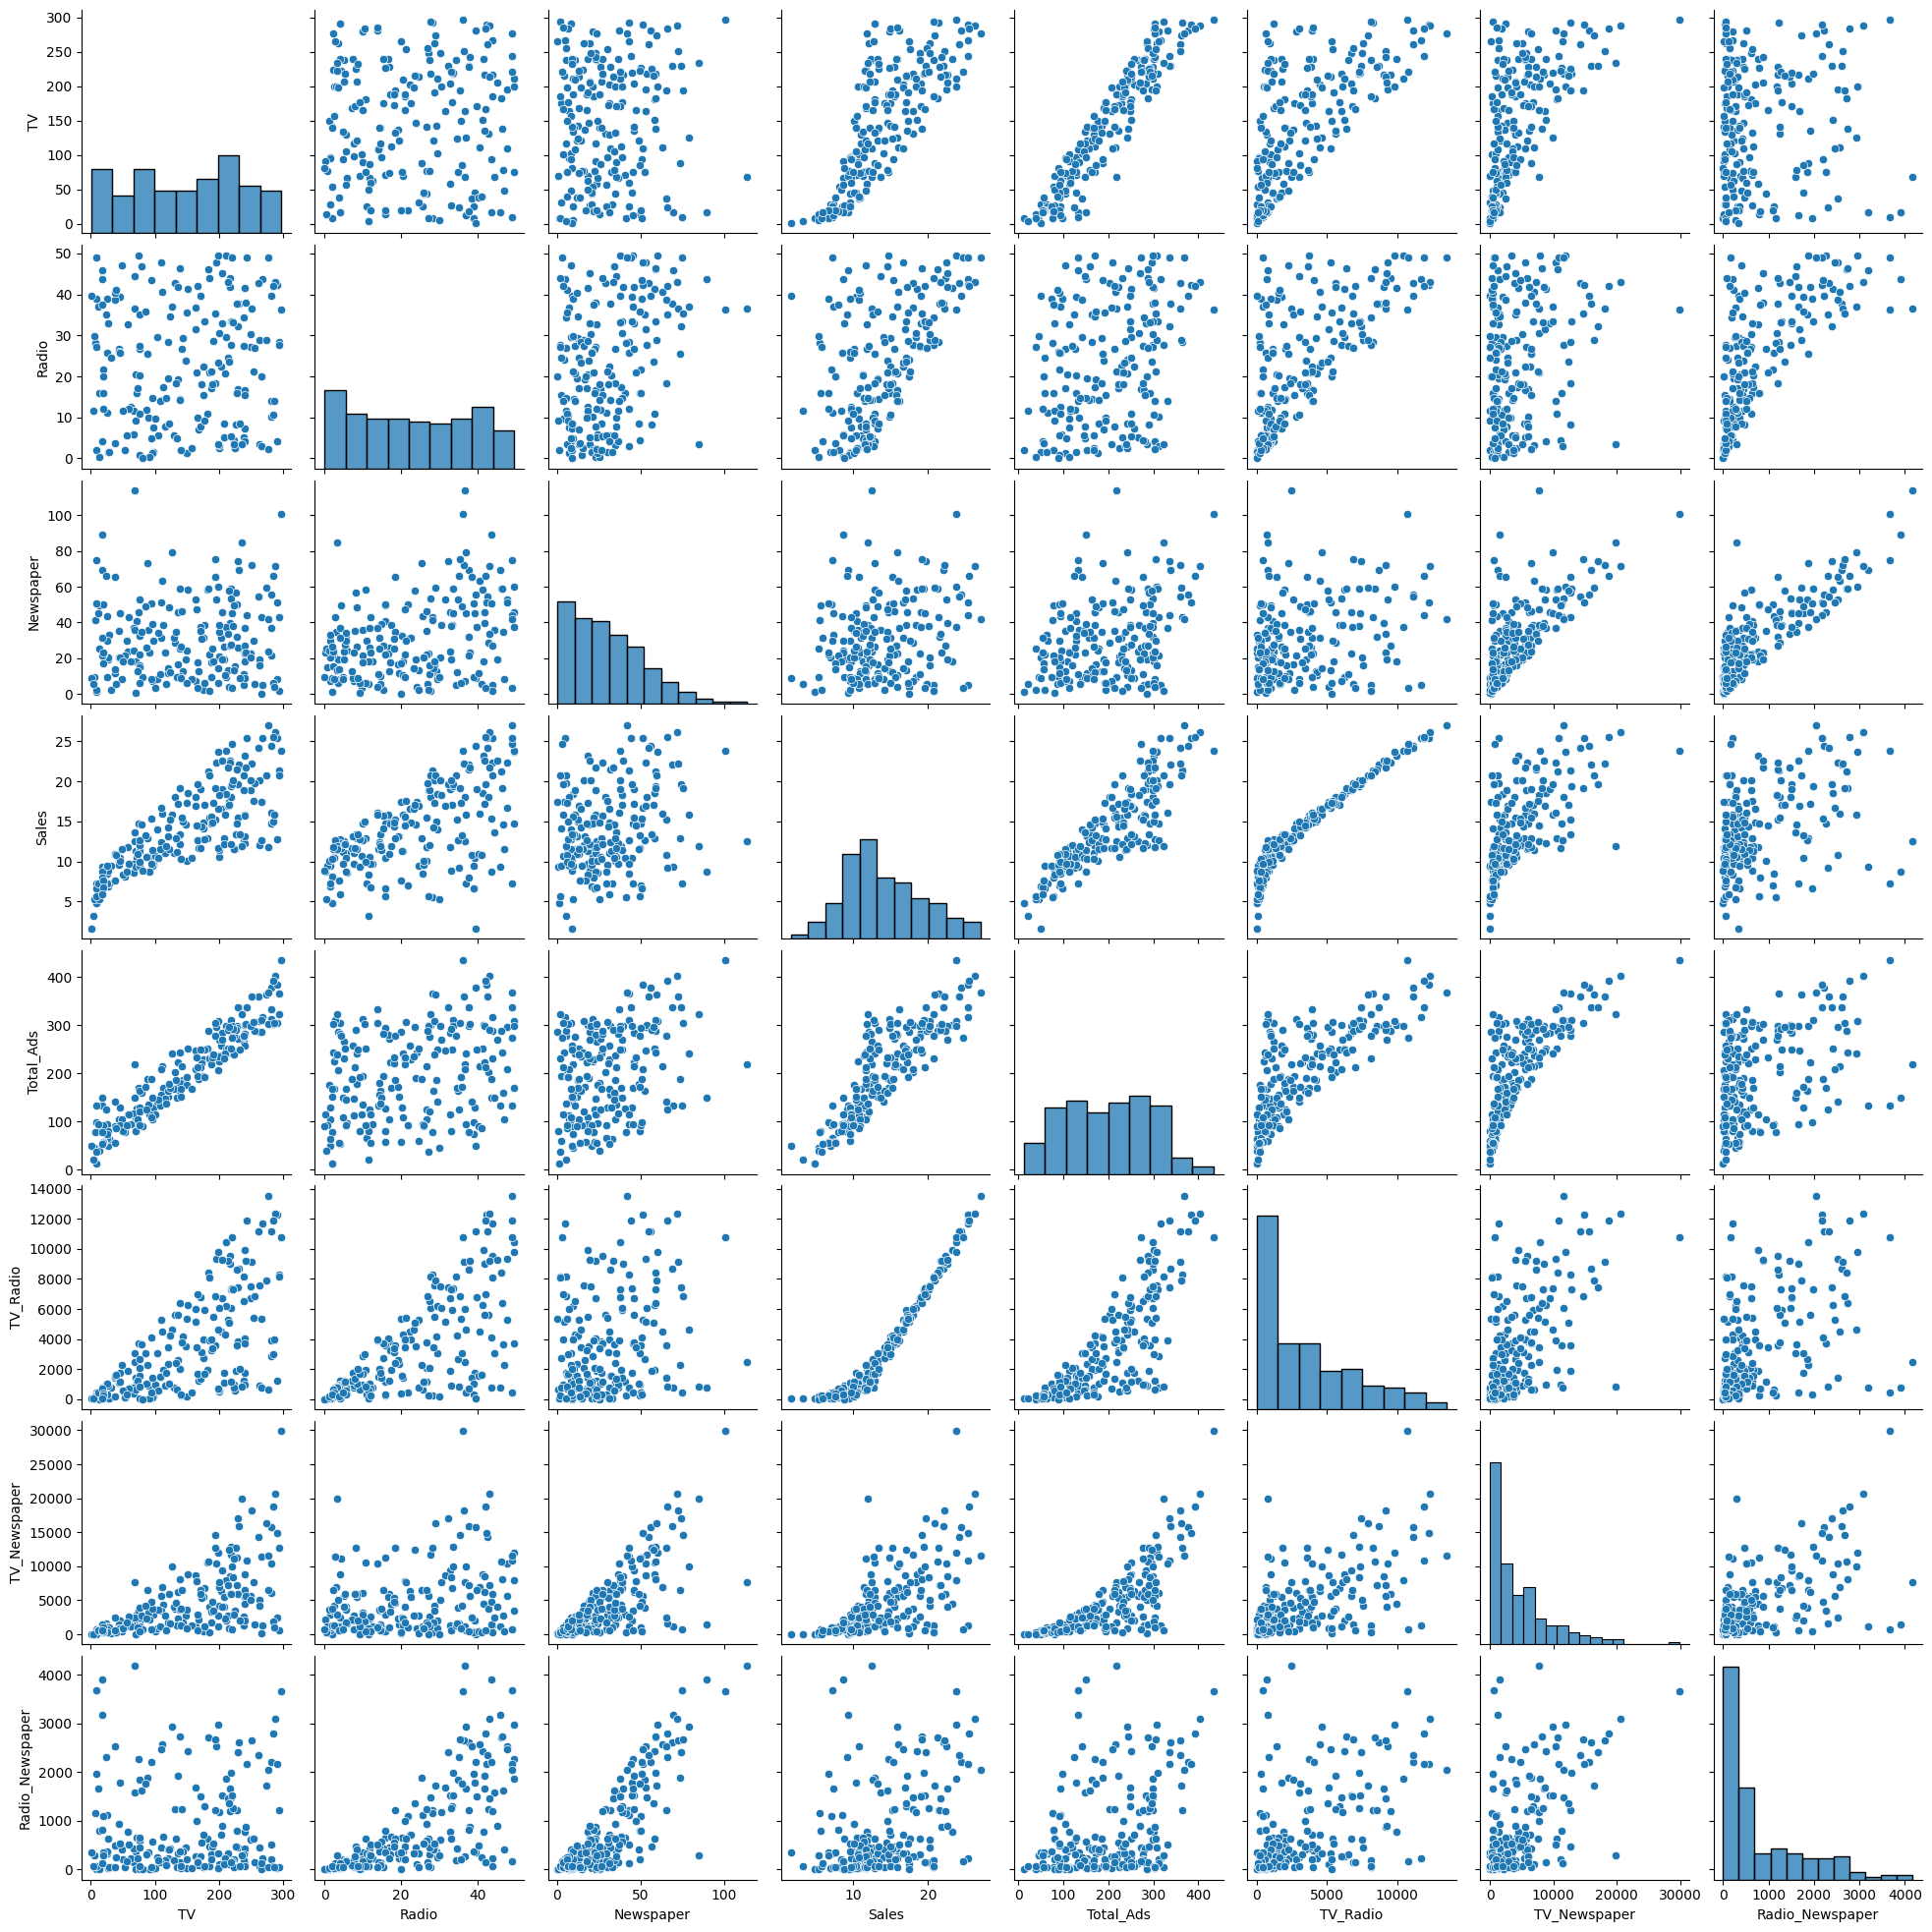

In [8]:
# ------------------------------
# 4.6. Pairplot
# ------------------------------
pairplot_fig = sns.pairplot(df)
pairplot_fig.savefig(os.path.join(figures_dir, "pairplot.png"))
plt.show()
plt.close()


In [9]:
# ------------------------------
# 4.7. Outlier Detection
# ------------------------------
def detect_outliers(df, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].index
        outlier_indices[col] = outliers.tolist()
    return outlier_indices

numeric_cols = df.select_dtypes(include="number").columns
outliers = detect_outliers(df, numeric_cols)

print(" Outlier Indices by Column:")
for col, idx in outliers.items():
    print(f"{col}: {idx}")

 Outlier Indices by Column:
TV: []
Radio: []
Newspaper: [16, 101]
Sales: []
Total_Ads: []
TV_Radio: [175]
TV_Newspaper: [0, 17, 93, 98, 101, 124, 137, 141, 165, 183, 198]
Radio_Newspaper: [2, 5, 16, 55, 75, 101, 118, 183]


## 🤖 Step 5: Model Training & Comparison

In this step, we train multiple **regression models** to predict sales based on advertising spends.  
The goal is to identify the model that performs best in terms of **accuracy (R²)** and **error (RMSE)**.

---

### 🧠 Models Used:
1. **Linear Regression**
   - A simple baseline model assuming a linear relationship between ad spend and sales.
2. **Random Forest Regressor**
   - An ensemble of multiple decision trees that improves performance and reduces overfitting.
3. **Gradient Boosting Regressor**
   - Sequentially builds models to correct previous errors, often achieving higher accuracy.

---

### ⚙️ Steps Performed:
1. **Train-Test Split:**  
   - Dataset is divided into 80% training and 20% testing sets.
2. **Feature Scaling:**  
   - Applied `StandardScaler` to normalize features for better model convergence.
3. **Model Training:**  
   - Each model is trained on scaled data.
4. **Evaluation Metrics:**
   - **RMSE (Root Mean Squared Error):** Measures prediction error.
   - **R² (R-Squared):** Measures how well the model explains the variability in sales.
5. **Model Comparison:**
   - Compare all models on performance metrics.
   - Select and save the best-performing model.

---

### 📊 Example Output:
- Model Training Complete

- Model Comparison Results:
- LinearRegression -> RMSE: 0.887, R2: 0.975
- RandomForest -> RMSE: 0.616, R2: 0.988
- GradientBoosting -> RMSE: 0.599, R2: 0.989

- Best Model Selected: GradientBoosting
- Saved at: models/best_model.pkl

---

✅ **Conclusion:**
- The **Gradient Boosting Regressor** achieved the **lowest RMSE (0.599)** and the **highest R² (0.989)**.  
- This model generalizes well and is chosen as the **final production model**, saved at  
  `models/best_model.pkl` for deployment.

In [10]:
# -------------------------------
# 5: Model Training & Comparison
# -------------------------------
from src.model import train_and_compare_models

model_save_path = os.path.join(BASE_DIR, "models", "best_model.pkl")

results, best_model_name = train_and_compare_models(
    df, target_col="Sales", test_size=0.2, random_state=RANDOM_STATE, model_save_path=model_save_path
)

print(" Model Training Complete\n")
print(" Model Comparison Results:")
for model, metrics in results.items():
    print(f"{model} -> RMSE: {metrics['RMSE']:.3f}, R2: {metrics['R2']:.3f}")

print(f"\n Best Model Selected: {best_model_name}")
print(f" Saved at: {model_save_path}")


 Model Training Complete

 Model Comparison Results:
LinearRegression -> RMSE: 0.887, R2: 0.975
RandomForest -> RMSE: 0.616, R2: 0.988
GradientBoosting -> RMSE: 0.599, R2: 0.989

 Best Model Selected: GradientBoosting
 Saved at: C:\Users\ayesh\Projects\sales_prediction\models\best_model.pkl


## 🚀 Step 6: Test Deployment Prediction

In this step, we simulate how the trained machine learning model will behave during deployment.  
We load the **saved best model** and **scaler**, then make a sales prediction for a new set of advertising inputs.

---

### 🧩 Steps Performed:
1. **Load Trained Model:**
   - The best model (`Gradient Boosting Regressor`) and the fitted scaler are loaded from  
     `models/best_model.pkl`.

2. **Prepare Input Data:**
   - A sample input dictionary is created with example advertising spend values:
     ```python
     sample_input = {
         "TV": 100,
         "Radio": 30,
         "Newspaper": 20,
         "Total_Ads": 150,
         "TV_Radio": 3000,
         "TV_Newspaper": 2000,
         "Radio_Newspaper": 600
     }
     ```

3. **Prediction Pipeline:**
   - Input features are transformed using the scaler.
   - The trained model predicts sales for the given input.

---

### 📈 Example Output:
Predicted Sales: 13.77

---

### ✅ Interpretation:
- For an advertising campaign spending **$100k on TV**, **$30k on Radio**, and **$20k on Newspaper**,  
  the model predicts **sales of approximately 13.77 units** (in thousands).  
- This verifies that the trained model and preprocessing pipeline are working correctly before deployment.

---

💡 **Next Steps:**
The next step involves integrating this model into a **Streamlit application (`app.py`)**  
for real-time prediction and visualization, enabling business teams to interactively estimate sales outcomes.


In [11]:
# -------------------------------
# 6: Test Deployment Prediction
# -------------------------------
from src.deploy import load_model, predict_sales

# Load model
model, scaler = load_model(model_save_path)

# Example input (one sample)
sample_input = {
    "TV": 100,
    "Radio": 30,
    "Newspaper": 20,
    "Total_Ads": 150,
    "TV_Radio": 3000,
    "TV_Newspaper": 2000,
    "Radio_Newspaper": 600,
}

predicted_sales = predict_sales(model, scaler, sample_input)
print(f" Predicted Sales: {predicted_sales:.2f}")


 Predicted Sales: 13.77


C:\Users\ayesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 💡 Key Insights

- **TV advertising** has the strongest positive impact on sales.  
- **Radio advertising** contributes moderately to sales.  
- **Newspaper advertising** has minimal effect compared to TV and Radio.  
- Feature engineering, such as interaction terms and total advertising spend, improved model predictive power.  
- The trained model can effectively predict sales for new advertising budgets, helping in data-driven decision-making.

---

## 🏁 Conclusion

- A **regression-based sales prediction model** was successfully developed using advertising data.  
- The project demonstrated the importance of **data preprocessing, feature engineering, and exploratory data analysis** in building effective predictive models.  
- The model provides a practical tool for businesses to **optimize advertising budgets** across TV, Radio, and Newspaper.  
- Overall, this project highlights how **data-driven insights** can enhance marketing strategies and improve revenue forecasting.

---

## ⚠️ Limitations

- Dataset includes only a few advertising channels.  
- External factors affecting sales (e.g., market trends, seasonality) are not considered.  
- The model assumes linear relationships; complex non-linear patterns may be missed.

---

## 🚀 Future Enhancements

- Include additional features such as online advertising, seasonal trends, and promotions.  
- Explore advanced models like Random Forest, XGBoost, or Neural Networks.  
- Build a **dashboard** for interactive visualization of advertising spend vs predicted sales.  
- Deploy the model as a web app for real-time sales forecasting.

---

 ## 📚 References

- Dataset: [Advertising Dataset on Kaggle](https://www.kaggle.com/datasets/gauravtopre/advertising)  
- Python Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  
- Tutorials: Scikit-learn Regression Guide, Matplotlib & Seaborn Visualization Tutorials

---

## 🙏 Thank You

Thank you for reviewing this Sales Prediction Project notebook.  
We hope it provides clear insights into **how advertising budgets impact sales** and demonstrates **the process of building a predictive model from scratch**.

For any questions or feedback, feel free to reach out.  
Happy Data-Driven Decision Making! 🚀
